In [72]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv("/content/car_evaluation.csv", header=None,
                 names=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output'])
# index_col=0은 첫 번째 열(0번째 열)을 DataFrame의 인덱스로 설정하는 옵션
# 컬럼이 없으므로 header=None을 활용
# names를 사용해 지정
print(df)

      price  maint  doors persons lug_capacity safety output
0     vhigh  vhigh      2       2        small    low  unacc
1     vhigh  vhigh      2       2        small    med  unacc
2     vhigh  vhigh      2       2        small   high  unacc
3     vhigh  vhigh      2       2          med    low  unacc
4     vhigh  vhigh      2       2          med    med  unacc
...     ...    ...    ...     ...          ...    ...    ...
1723    low    low  5more    more          med    med   good
1724    low    low  5more    more          med   high  vgood
1725    low    low  5more    more          big    low  unacc
1726    low    low  5more    more          big    med   good
1727    low    low  5more    more          big   high  vgood

[1728 rows x 7 columns]


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_capacity  1728 non-null   object
 5   safety        1728 non-null   object
 6   output        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [74]:
# 결측치 확인
print(df.isnull().sum())

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


In [75]:
# 인코딩
encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])
print(df)

      price  maint  doors  persons  lug_capacity  safety  output
0         3      3      0        0             2       1       2
1         3      3      0        0             2       2       2
2         3      3      0        0             2       0       2
3         3      3      0        0             1       1       2
4         3      3      0        0             1       2       2
...     ...    ...    ...      ...           ...     ...     ...
1723      1      1      3        2             1       2       1
1724      1      1      3        2             1       0       3
1725      1      1      3        2             0       1       2
1726      1      1      3        2             0       2       1
1727      1      1      3        2             0       0       3

[1728 rows x 7 columns]


In [76]:
# 레이블 확인
# 각 값이 몇 번 등장했는지 빈도수를 계산
df['output'].value_counts()

,count
output,
2,1210
0,384
1,69
3,65


In [77]:
from tensorflow.keras.utils import to_categorical

# x, y값 분류 및 numpy 변환
X = df.drop(['output'], axis=1).values
# y는 one-hot-encoding 적용
y = df['output'].values
Y = to_categorical(y, num_classes=4)

X.shape, Y.shape

((1728, 6), (1728, 4))

In [78]:
# train, test값 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382, 4), (346, 4))

# 회귀

In [79]:
# 딥러닝(분류) 시작
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD,Adam

# 머신 정의
model = Sequential()

# ReLU (Rectified Linear Unit) 활성화 함수 사용
model.add(Dense(100,input_shape=(6,),activation='relu', name='relu1'))
model.add(Dense(50,activation='relu', name='relu2'))
model.add(Dense(20,activation='relu', name='relu3'))
model.add(Dense(4,activation='softmax', name='softmax1'))


# Adam: optimization function 지정
model.compile(Adam(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ relu1 (Dense)                        │ (None, 100)                 │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2 (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu3 (Dense)                        │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax1 (Dense)                     │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,854 (26.77 KB)

 Trainable params: 6,854 (26.77 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
EPOCHS = 10

model_history=model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6100 - loss: 0.9593 - val_accuracy: 0.6965 - val_loss: 0.7289
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7183 - loss: 0.6546 - val_accuracy: 0.6647 - val_loss: 0.6595
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.5831 - val_accuracy: 0.7197 - val_loss: 0.5756
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7783 - loss: 0.5119 - val_accuracy: 0.7832 - val_loss: 0.4931
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.4128 - val_accuracy: 0.8468 - val_loss: 0.4025
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3382 - val_accuracy: 0.8410 - val_loss: 0.4003
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.2963 - val_accuracy: 0.8613 - val_loss: 0.3073
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.2439 - val_accuracy: 0.8468 - val_loss

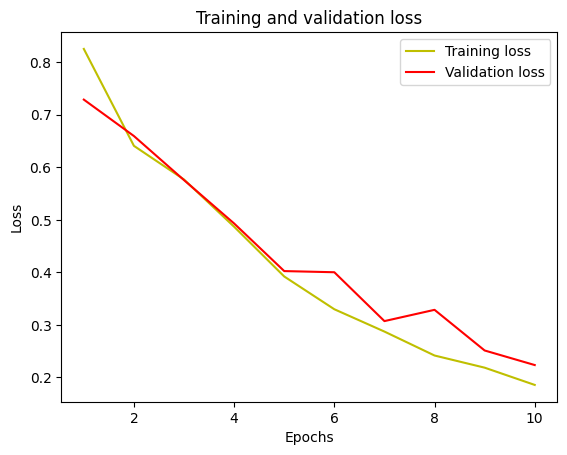

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

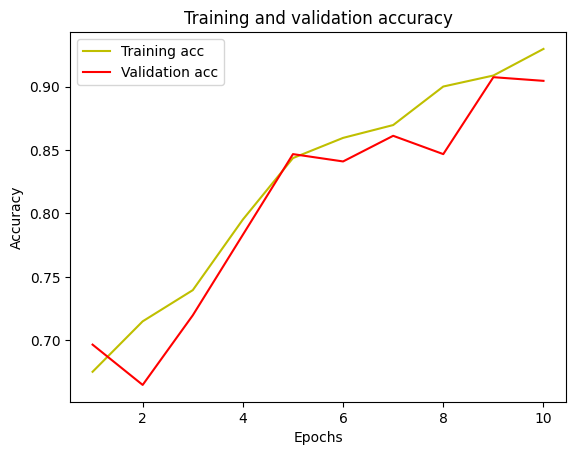

In [82]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [83]:
# 혼동 행렬 확인
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        79
           1       0.86      0.35      0.50        17
           2       0.96      0.97      0.96       240
           3       0.88      0.70      0.78        10

    accuracy                           0.90       346
   macro avg       0.86      0.72      0.76       346
weighted avg       0.91      0.90      0.90       346

[[ 67   1  10   1]
 [ 11   6   0   0]
 [  7   0 233   0]
 [  3   0   0   7]]
